The project introduces StyleLens, a fashion image retrieval system that employs deep learning. It assists users in efficiently finding specific clothing items by enabling them to upload images or input text describing image categories and attributes. By analyzing patterns in user-shared images and integrating an in-store DeepFashion dataset, StyleLens offers personalized recommendations, simplifying fashion exploration and enhancing the shopping experience.

Dataset : https://drive.google.com/drive/folders/1w3huV6E-ECjsmDHCQ8SKExImq4fSVQjt?usp=drive_link

### Exploratory Data Analysis for In-shop Clothes Retrieval

In [ ]:
!pip install gdown -U --no-cache-dir
!sudo apt-get install tree

In [2]:
import gdown
import os
#https://www.makeuseof.com/create-direct-link-google-drive-files/

### Loading the dataset from google drive


In [3]:
list_eval_partition = "https://drive.google.com/uc?export=download&id=1WJSvStzBHsyw0XomdRwgQzJ2lWA7JEnA" #"https://drive.google.com/file/d/1WJSvStzBHsyw0XomdRwgQzJ2lWA7JEnA/view?usp=drive_link"
list_description_inshop = "https://drive.google.com/uc?export=download&id=16ncRxhMjM_tOfjaWBSjaua1SDlxQmHEJ"

dataset_base_path = "/content/"

eval_path = os.path.join(os.path.abspath(dataset_base_path), 'list_eval_partition.txt')
description_inshop_path = os.path.join(os.path.abspath(dataset_base_path), 'ist_description_inshop.json')

if not os.path.exists(eval_path):
   gdown.download(list_eval_partition, eval_path, quiet=False)
   gdown.download(list_description_inshop, description_inshop_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1WJSvStzBHsyw0XomdRwgQzJ2lWA7JEnA
To: /content/list_eval_partition.txt
100%|██████████| 5.01M/5.01M [00:00<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=16ncRxhMjM_tOfjaWBSjaua1SDlxQmHEJ
To: /content/ist_description_inshop.json
100%|██████████| 5.44M/5.44M [00:00<00:00, 89.7MB/s]


Download img data

In [4]:
import zipfile
images_url = "https://drive.google.com/uc?id=1SlE6hs3mtc9Kh17gauHuWfELeUOMojPD&export=download"

dataset_base_path = "/content/"

zip_file_path = os.path.join(os.path.abspath(dataset_base_path), 'img.zip')

if not os.path.exists(zip_file_path):
   gdown.download(images_url, zip_file_path, quiet=False)

if not os.path.exists(os.path.join(os.path.abspath(dataset_base_path), "img")):
   with zipfile.ZipFile(zip_file_path,"r") as zip_ref:
       zip_ref.extractall(dataset_base_path)

Downloading...
From (original): https://drive.google.com/uc?id=1SlE6hs3mtc9Kh17gauHuWfELeUOMojPD&export=download
From (redirected): https://drive.google.com/uc?id=1SlE6hs3mtc9Kh17gauHuWfELeUOMojPD&export=download&confirm=t&uuid=0215ce00-4da9-4588-a64a-d1a27de24aa0
To: /content/img.zip
100%|██████████| 831M/831M [00:10<00:00, 82.8MB/s]


In [5]:
!tree '/content/'

Streaming output truncated to the last 5000 lines.
│           │   ├── 06_2_side.jpg
│           │   ├── 06_3_back.jpg
│           │   ├── 06_4_full.jpg
│           │   ├── 06_6_flat.jpg
│           │   ├── 08_1_front.jpg
│           │   ├── 08_2_side.jpg
│           │   ├── 08_3_back.jpg
│           │   ├── 08_4_full.jpg
│           │   ├── 08_6_flat.jpg
│           │   ├── 09_1_front.jpg
│           │   ├── 09_2_side.jpg
│           │   ├── 09_4_full.jpg
│           │   └── 09_7_additional.jpg
│           ├── id_00005037
│           │   ├── 04_1_front.jpg
│           │   ├── 04_2_side.jpg
│           │   ├── 04_3_back.jpg
│           │   ├── 04_7_additional.jpg
│           │   ├── 05_1_front.jpg
│           │   ├── 05_2_side.jpg
│           │   ├── 05_3_back.jpg
│           │   ├── 05_7_additional.jpg
│           │   ├── 06_1_front.jpg
│           │   ├── 06_2_side.jpg
│           │   ├── 06_3_back.jpg
│           │   └── 06_7_additional.jpg
│           ├── id_00005040
│           │ 

In [6]:
import pandas as pd

def convert_instore_dataset_to_df(file_path):

  eval_df = []

  with open(file_path, 'r') as file:
      for line in file:
          parts = line.strip().split()
          if len(parts) >= 3:  # Check if the line has at least 3 elements
            entry = {'image_name': parts[0], 'item_id': parts[1], 'evaluation_status': parts[2]}

            words = entry['image_name'].split('/')
            if len(words) > 1:
              entry['Category'] = words[2]
            else:
              entry['Category'] = 'Unknown'

            eval_df.append(entry)

  return pd.DataFrame(eval_df)

In [7]:
eval_df = convert_instore_dataset_to_df('/content/list_eval_partition.txt')
eval_df

,image_name,item_id,evaluation_status,Category
0,image_name,item_id,evaluation_status,Unknown
1,img/WOMEN/Dresses/id_00000002/02_1_front.jpg,id_00000002,train,Dresses
2,img/WOMEN/Dresses/id_00000002/02_2_side.jpg,id_00000002,train,Dresses
3,img/WOMEN/Dresses/id_00000002/02_4_full.jpg,id_00000002,train,Dresses
4,img/WOMEN/Dresses/id_00000002/02_7_additional.jpg,id_00000002,train,Dresses
...,...,...,...,...
52708,img/WOMEN/Jackets_Coats/id_00007982/12_7_addit...,id_00007982,gallery,Jackets_Coats
52709,img/WOMEN/Jackets_Coats/id_00007982/13_1_front...,id_00007982,query,Jackets_Coats
52710,img/WOMEN/Jackets_Coats/id_00007982/13_2_side.jpg,id_00007982,gallery,Jackets_Coats
52711,img/WOMEN/Jackets_Coats/id_00007982/13_3_back.jpg,id_00007982,query,Jackets_Coats


### Visualizing images from the Dataset
Just to get an idea of how the image set looks in terms of style and posture.

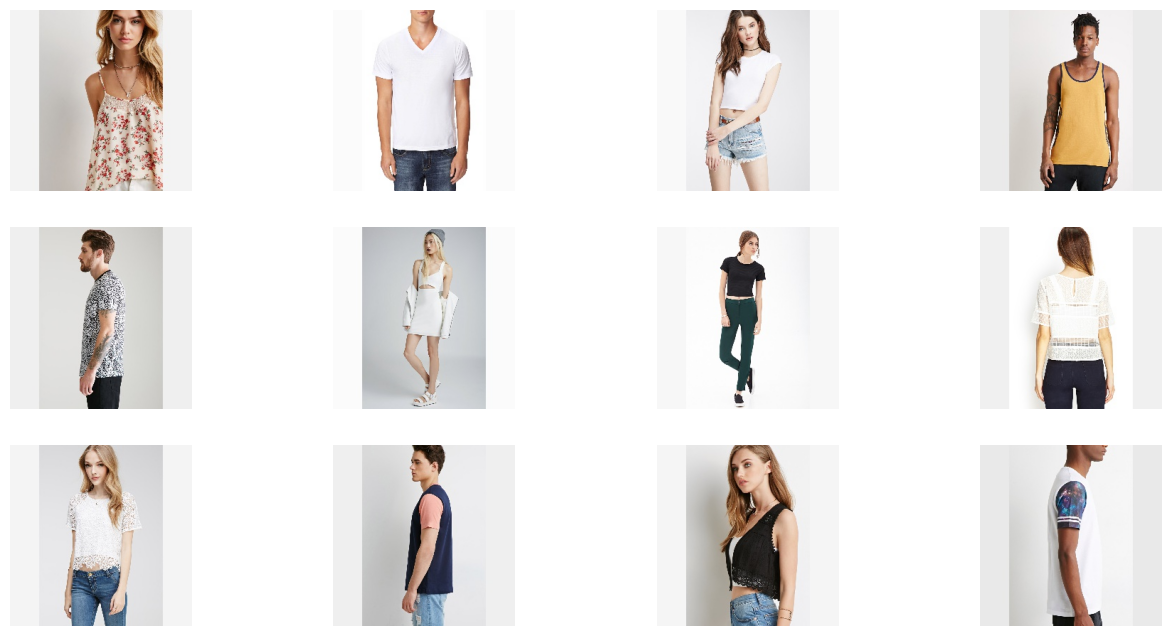

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df = pd.DataFrame(eval_df['image_name'])

# Randomly select image paths
random_image_paths = df['image_name'].sample(n=12, random_state=2)

fig, axs = plt.subplots(3, 4, figsize=(16, 8))

# Iterate over randomly selected image paths
for i, img_path in enumerate(random_image_paths):
    img = mpimg.imread(img_path)
    row = i // 4
    col = i % 4
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

plt.show()


The total number of images in this dataset is 52,713.

In [8]:
eval_df.shape
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52713 entries, 0 to 52712
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_name         52713 non-null  object
 1   item_id            52713 non-null  object
 2   evaluation_status  52713 non-null  object
 3   Category           52713 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [9]:
eval_df.describe()

,image_name,item_id,evaluation_status,Category
count,52713,52713,52713,52713
unique,52713,7983,4,18
top,image_name,id_00003523,train,Tees_Tanks
freq,1,162,25882,14487


In [10]:
#checking and droping duplicates
eval_df.drop_duplicates(inplace=True)

In [11]:
eval_df.describe()

,image_name,item_id,evaluation_status,Category
count,52713,52713,52713,52713
unique,52713,7983,4,18
top,image_name,id_00003523,train,Tees_Tanks
freq,1,162,25882,14487


Showing images count based on evaluation type.

In [12]:
eval_df.groupby("evaluation_status")['evaluation_status'].count()

evaluation_status
evaluation_status        1
gallery              12612
query                14218
train                25882
Name: evaluation_status, dtype: int64

In [13]:
#Showing images based on catergory.
eval_df.groupby("Category")['Category'].count()

Category
Blouses_Shirts          7964
Cardigans               1436
Denim                    804
Dresses                 6999
Graphic_Tees            1297
Jackets_Coats           1895
Jackets_Vests            424
Leggings                 335
Pants                   2821
Rompers_Jumpsuits       1696
Shirts_Polos             722
Shorts                  4476
Skirts                  2045
Suiting                   39
Sweaters                3641
Sweatshirts_Hoodies     1631
Tees_Tanks             14487
Unknown                    1
Name: Category, dtype: int64

In [17]:
#droping unknown catergory as its count is very low
Category = eval_df[eval_df['Category'] != 'Unknown']

In [18]:
Category_count = Category.groupby("Category")['Category'].count()

In [19]:
Category_count

Category
Blouses_Shirts          7964
Cardigans               1436
Denim                    804
Dresses                 6999
Graphic_Tees            1297
Jackets_Coats           1895
Jackets_Vests            424
Leggings                 335
Pants                   2821
Rompers_Jumpsuits       1696
Shirts_Polos             722
Shorts                  4476
Skirts                  2045
Suiting                   39
Sweaters                3641
Sweatshirts_Hoodies     1631
Tees_Tanks             14487
Name: Category, dtype: int64

Image distribution based on category.

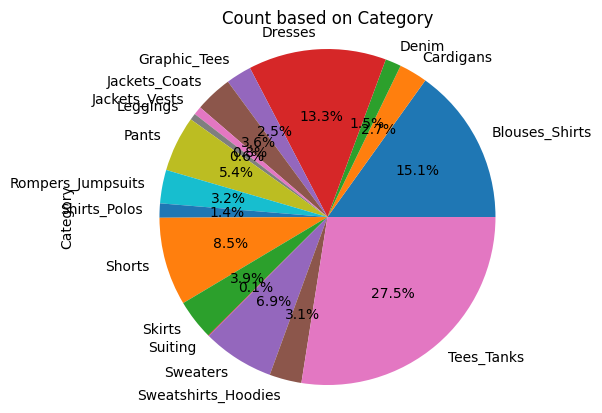

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
Category_count.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Count based on Category')
plt.show()

In [21]:
import plotly.express as px

fig = px.sunburst(eval_df, path=["evaluation_status",'Category'])

fig.update_layout(
    title='Summary Category and evaluation',
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the plot
fig.show()

### Now will see image description data looks like

In [22]:
import json
import tqdm

In [23]:
#loaded description file
with open('/content/ist_description_inshop.json', "r", encoding="utf-8") as json_file:
        json_data = json.load(json_file)

I observed that the JSON data includes both description and color properties, which can be effectively utilized to generate text embeddings using sentence transformers. However, due to the data's lack of cleanliness, we may encounter limitations in its direct usability, necessitating data preprocessing. Below is a snippet of the JSON structure:

In [24]:
#print first two rows from file to see how the data looks like
for i, line in enumerate(json_data):
       if i < 2:
         print(json.dumps(line, indent=4))

{
    "item": "id_00000001",
    "color": "Cream",
    "description": [
        "This sheer Georgette top features a high collar and shirred shoulders. Complete with long sleeves and buttoned cuffs. ",
        "Unlined",
        "Lightweight, woven",
        "100% polyester",
        "24\" full length, 38\" chest, 38\" waist, 24\" sleeve length",
        "Measured from Small",
        "Hand wash cold",
        "Imported"
    ]
}
{
    "item": "id_00000002",
    "color": "Black-blush",
    "description": [
        "Style Deals - When temps start to rise, slip into this supremely cute babydoll dress outfitted with a vibrant floral print! Its warm-weather details include short sleeves, round neckline, and a slightly shorter length. Team this with your sandals, straw hat, and of course, your oversized sunnies. ",
        "Unlined, buttoned slit in back",
        "Lightweight, woven",
        "100% rayon",
        "32\" full length, 36\" chest, 35\" waist, 6\" sleeve length",
        "Measu

Total number of object 8081 in file.

In [15]:
# Count the total number of objects
total_objects = len(json_data)

print("Total object count in the JSON file:", total_objects)

Total object count in the JSON file: 8081


Ensure that we do not have any duplicate data in the JSON file.

In [25]:
ids = []
duplicate_ids = []
for obj in json_data:
    item_id = obj.get("item")
    if item_id in ids:  # Check if ID is already in the list
        duplicate_ids.append(item_id)  # If yes, add it to the list of duplicates
    else:
        ids.append(item_id)

# Find the number of unique item IDs
unique_ids_count = len(ids)

print("Number of unique item IDs:", unique_ids_count)
print("Duplicate item IDs:", duplicate_ids[:10])

Number of unique item IDs: 7982
Duplicate item IDs: ['id_00000065', 'id_00000094', 'id_00000113', 'id_00000119', 'id_00000181', 'id_00000222', 'id_00000230', 'id_00000276', 'id_00000291', 'id_00000292']


As we observed duplicates during preprocessing, they will be removed from the dataset during preprocessing.

## Data Prepration

To split a fashion dataset into three categories: train, query, and gallery, typically used in tasks like image-based fashion retrieval:

Training Dataset (Train): This dataset is used to train the model. It consists of pairs of images or image embeddings along with their corresponding labels or identifiers.

Query Dataset (Query): This dataset contains images or image embeddings that are used as queries to search for similar items in the gallery dataset.

Gallery Dataset (Gallery): This dataset contains images or image embeddings that serve as the reference database against which queries are compared.

Here's a split the fashion dataset into these three categories:

In [26]:
import json
import os
import csv
import pandas as pd
from tqdm import tqdm

!mkdir preprossed-files

RESULT_PATH = '/content/preprossed-files'

def split_img_dataset():
    print('split img dataset...')
    fn = open('/content/list_eval_partition.txt').readlines()
    train = open(os.path.join(RESULT_PATH, 'train_img.txt'), 'w')
    query = open(os.path.join(RESULT_PATH, 'query_img.txt'), 'w')
    gallery = open(os.path.join(RESULT_PATH, 'gallery_img.txt'), 'w')

    for _, line in tqdm(enumerate(fn[2:])):
        aline = line.strip('\n').split()
        img, _, prefix = aline[0], aline[1], aline[2]

        if prefix == 'train':
            train.write(img)
            train.write('\n')
        else:
            if prefix == 'query':
                query.write(img)
                query.write('\n')

            elif prefix == 'gallery':
                gallery.write(img)
                gallery.write('\n')

    train.close()
    query.close()
    gallery.close()

def extract_image_description():
    print('extract image description...')
    with open("/content/ist_description_inshop.json", "r", encoding="utf-8") as json_file:
        json_data = json.load(json_file)

    rows = []
    for item in tqdm(json_data):
        item_id = item['item']
        color = item['color'].replace('-', ' ')
        sentences_with_color = f'color is {color} ' + ' '.join(item['description'][1:3])
        rows.append((item_id, sentences_with_color))

    # Write the rows to a CSV file
    csv_file = os.path.join(RESULT_PATH, 'sentences-with-item.csv')
    with open(csv_file, mode='w',  encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Item', 'Sentence'])  # Write header
        writer.writerows(rows)

def preprocess_caption(line, text2label_df):

    aline = line.strip('\n').split('/')
    id = aline[3]
    label = text2label_df[text2label_df['Item'] == id]['Sentence'].values[0]

    category = aline[2].replace('_', ' ')
    caption = f'{aline[1]} {category} ' + label

    return caption.lower()


def generate_imgage_label():
    print('generateing imgage labels...')
    csv_file = os.path.join(RESULT_PATH, 'sentences-with-item.csv')
    text2label_df = pd.read_csv(csv_file, encoding='utf-8')

    def get_label(fn, prefix):
        print(f'labels generating - {prefix}')
        rf = open(fn, encoding='utf-8').readlines()
        with open(os.path.join(RESULT_PATH, '%s_txt_labels.txt' % prefix), 'w', encoding='utf-8') as txtlblfile:
            for line in tqdm(rf):
                caption = preprocess_caption(line, text2label_df)
                txtlblfile.write(caption)
                txtlblfile.write('\n')
            txtlblfile.close()

    get_label(os.path.join(RESULT_PATH, 'train_img.txt'), 'train')
    get_label(os.path.join(RESULT_PATH, 'gallery_img.txt'), 'gallery')
    get_label(os.path.join(RESULT_PATH, 'query_img.txt'), 'query')

if __name__ == '__main__':
    split_img_dataset()
    extract_image_description()
    generate_imgage_label()


split img dataset...


52712it [00:00, 904909.29it/s]


extract image description...


100%|██████████| 8081/8081 [00:00<00:00, 646009.31it/s]


generateing imgage labels...
labels generating - train


100%|██████████| 25882/25882 [00:28<00:00, 924.28it/s]


labels generating - gallery


100%|██████████| 12612/12612 [00:14<00:00, 890.02it/s]


labels generating - query


100%|██████████| 14218/14218 [00:15<00:00, 911.44it/s] 


You can see that files have been created after preprocessing the data. Here, the generated files include images for gallery embedding generation and text files for text embedding generation.

In [28]:
!tree '/content/preprossed-files'

/content/preprossed-files
├── gallery_img.txt
├── gallery_txt_labels.txt
├── query_img.txt
├── query_txt_labels.txt
├── sentences-with-item.csv
├── train_img.txt
└── train_txt_labels.txt

0 directories, 7 files


Let me create dataset class so that i can train data with out trining

In [29]:
import torch
import os

class config:
  img_dir = '.'

  app_resources = 'output'

  base_dataset_file = '/content/preprossed-files'

  train_image_filename = os.path.join(base_dataset_file, 'train_img.txt')
  train_caption_filename = os.path.join(base_dataset_file, 'train_txt_labels.txt')

  val_image_filename =  os.path.join(base_dataset_file, 'query_img.txt')
  val_caption_filename =  os.path.join(base_dataset_file, 'query_txt_labels.txt')

  gal_image_filename =  os.path.join(base_dataset_file, 'gallery_img.txt')
  gal_caption_filename =  os.path.join(base_dataset_file, 'gallery_txt_labels.txt')


  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  embedding_size = 256

  def get_label():
          image_categories = ['Dresses', 'Skirts', 'Blouses_Shirts', 'Sweatshirts_Hoodies', 'Cardigans',
                              'Jackets_Coats', 'Sweaters', 'Tees_Tanks', 'Shorts', 'Rompers_Jumpsuits',
                              'Graphic_Tees', 'Pants', 'Denim', 'Jackets_Vests', 'Leggings', 'Shirts_Polos',
                              'Suiting']

          category_to_label = {category: i for i, category in enumerate(image_categories)}
          return category_to_label

In [30]:
import torch
import os
import pandas as pd
from PIL import Image
from torchvision import transforms

class SLDataset(torch.utils.data.Dataset):
    def __init__(self, image_filename, caption_filename, img_dir, transform=None):

        self.img_dir = img_dir

        self.image_paths = pd.read_csv(image_filename, sep='\t')

        self.text_labels = pd.read_csv(caption_filename, sep='\t')

        self.labels = self.get_label()

        self.transform = transform

        self.preprocess = transforms.Compose([
            transforms.Resize(224),
            #transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def __getitem__(self, idx):
        item = {}

        #img_path = os.path.join(self.img_dir, self.image_paths.iloc[idx, 0])
        img_path = os.path.join('/content/', self.image_paths.iloc[idx, 0])
        item['img_path'] = img_path

        image = Image.open(img_path)
        if self.transform:
            image = self.preprocess(image)
        item['image'] = image

        item['caption'] = self.text_labels.iloc[idx, 0]

        words = self.image_paths.iloc[idx, 0].split('/')
        item['target_label'] = torch.tensor(self.labels.get(words[2]))

        return item

    def __len__(self):
        return len(self.image_paths)

    def get_label(self):
          image_categories = ['Dresses', 'Skirts', 'Blouses_Shirts', 'Sweatshirts_Hoodies', 'Cardigans',
                              'Jackets_Coats', 'Sweaters', 'Tees_Tanks', 'Shorts', 'Rompers_Jumpsuits',
                              'Graphic_Tees', 'Pants', 'Denim', 'Jackets_Vests', 'Leggings', 'Shirts_Polos',
                              'Suiting']

          category_to_label = {category: i for i, category in enumerate(image_categories)}
          return category_to_label

if __name__ == '__main__':

    cnf = config()
    train_dataset = SLDataset(image_filename=cnf.val_image_filename, caption_filename=cnf.val_caption_filename, img_dir=cnf.img_dir, transform='transform')

    c=0
    for batch in train_dataset:
        if c > 5:
            break
        print(f"image path {batch['img_path']}, caption: {batch['caption']}")
        c +=1

image path /content/img/WOMEN/Blouses_Shirts/id_00000001/02_4_full.jpg, caption: women blouses shirts color is cream unlined lightweight, woven
image path /content/img/WOMEN/Tees_Tanks/id_00000007/01_2_side.jpg, caption: women tees tanks color is heather grey black officially licensed product lightweight knit
image path /content/img/WOMEN/Tees_Tanks/id_00000007/01_4_full.jpg, caption: women tees tanks color is heather grey black officially licensed product lightweight knit
image path /content/img/WOMEN/Tees_Tanks/id_00000007/01_6_flat.jpg, caption: women tees tanks color is heather grey black officially licensed product lightweight knit
image path /content/img/WOMEN/Dresses/id_00000008/02_7_additional.jpg, caption: women dresses color is black semi-sheer, lightweight 95% rayon, 5% spandex
image path /content/img/WOMEN/Dresses/id_00000011/02_2_side.jpg, caption: women dresses color is black red invisible back zipper unlined, woven


In [31]:
image_categories = ['Dresses', 'Skirts', 'Blouses_Shirts', 'Sweatshirts_Hoodies', 'Cardigans',
                              'Jackets_Coats', 'Sweaters', 'Tees_Tanks', 'Shorts', 'Rompers_Jumpsuits',
                              'Graphic_Tees', 'Pants', 'Denim', 'Jackets_Vests', 'Leggings', 'Shirts_Polos',
                              'Suiting']

In [32]:
train_dataset = SLDataset(image_filename=cnf.val_image_filename, caption_filename=cnf.val_caption_filename, img_dir=cnf.img_dir, transform='transform')

Dataset
We will use Deep fashion dataset which contains 17  categories where each class consists 40-12000 images. I’ve chosen this dataset because it is relatively small (~850 MB) compared to other data sets available in catalog.

Also for the purpose of the demo and due to notbook hardware limitation, I’ve only decided to take examples from 30 imagages from per class.

In [35]:
from collections import defaultdict
category_counts = defaultdict(int)

# Dictionary to store selected records for each category
image_records = []
label_records = []

for itme1 in tqdm(train_dataset):
  label = itme1['target_label'].item()

  # Check if the category count exceeds 30
  if category_counts[label] < 30:
      image_records.append(itme1['img_path'])
      label_records.append(image_categories[label])
      category_counts[label] += 1

  # Break the loop if 30 records have been selected for all categories
  if all(count >= 30 for count in category_counts.values()):
      break

100%|██████████| 14217/14217 [00:37<00:00, 376.36it/s]


In [ ]:
for category, count in category_counts.items():
    print(f"Category {category}: {count} records selected")

In [37]:
label_records[:4]

['Blouses_Shirts', 'Tees_Tanks', 'Tees_Tanks', 'Tees_Tanks']

In [39]:
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import plotly.express as px

# Load pre-trained ResNet-50 model
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()

# Define image preprocessing transform
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess multiple images
image_paths = image_records
input_tensors = []
for image_path in tqdm(image_paths):
    image = Image.open(image_path)
    input_tensor = preprocess(image)
    input_tensors.append(input_tensor.unsqueeze(0))  # Add batch dimension

# Extract features from ResNet-50 model for each image
features_list = []
for input_tensor in tqdm(input_tensors):
    with torch.no_grad():
        features = resnet50(input_tensor)
        features_list.append(features.squeeze().numpy())

# Convert features to NumPy array
features_array = np.array(features_list)

# Apply PCA to reduce dimensionality to 50 features
pca = PCA(n_components=50)
reduced_features_pca = pca.fit_transform(features_array.reshape(len(features_array), -1))

# Apply t-SNE to further reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=5, learning_rate=200)  # Lower perplexity
reduced_features_tsne = tsne.fit_transform(reduced_features_pca)

# Convert reduced_features_tsne to DataFrame
df = pd.DataFrame(reduced_features_tsne, columns=['x', 'y'])


100%|██████████| 494/494 [01:26<00:00,  5.69it/s]


In [40]:

# Plot t-SNE embeddings with images using Plotly Express
fig = px.scatter(df, x='x', y='y', hover_name=label_records, color=label_records)
fig.show()

The figure above shows that the datapoints are scattered. Also note that plotly chose to use very similar colors for multiple classes so it might seem they are completely scattered for embeddings from a pre-trained model.For this reason, fine-tuning the model becomes necessary.